## Link to dataset:
 - Kaggle - https://www.kaggle.com/datasets/rajkumarpandey02/list-of-countries-by-sugarcane-production
 - GitHub - https://github.com/soumyadas96/Data-Analysis-Projects/blob/main/Sugarcane%20Production/World-wide%20Sugarcane%20Production%20by%20Country.csv

## Project Overview:

This data analysis project aims to provide insights into the annual sugarcane production of all countries. By analyzing various aspects of the data, we seek to identify the trends, make data-driven recommendations, and gain deeper understanding for future trends in Sugarcane Production.

### Columns in the dataset:

- Country Name
- Continent Name
- Production (Tons)
- Production per Person (Kg)
- Land Area Acreage (Hectare)
- Yield (Kg/Hectare)

### Here's our approach:

We will achieve our goal in 3 phases:

1. **Data Cleaning :** We will check all the dataset for any mishandled row / column with misplaced decimal and commas to be corrected, check and find solution for null values and outliers (based on the number of null values and distribution followed by outliers) and take required actions.
2. **Data Analysis :** We will carry out Univariate, Bivariate, and Multivariate Analysis between each columns and end up with correlation analysis to confirm our findings.
3. **Findings and Recommendations :** Lastly, we will gather our findings to give final recommendations.

### Tool and Libraries Used:

- Tool
  - Python 3.11.7
- Libraries
  - numpy 1.26.4
  - pandas 2.14
  - seaborn 0.13.2
  - matplotlib 3.8.0
 
### What questions are expected to solve?

- Which are important factors in increasing the total production in Sugarcane Production around the world?
- Which continents and countries contribute the most in each category?
- Do countries and continent with higher production of sugarcane or production per person has higher acerage of land?
& many more.

## Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("World-wide Sugarcane Production by Country.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.shape

(103, 7)

## Data Cleaning

In [4]:
##rectifying misplaced ',' and '.' in columns 4 to 7

df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

df.sample(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
42,42,Panama,North America,2419638,581814,37995,63683.1
67,67,Guinea,Africa,304975,25664,5683,53668.4
20,20,Iran,Asia,7687593,9403,95785,80259.1
51,51,Jamaica,North America,1422432,521254,26255,54178.2
53,53,Nigeria,Africa,1337572,6776,82586,16196.1


In [5]:
## changing data column names for simplification

df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

df.tail()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8
102,102,Syria,Asia,1,0,0,83034.2


In [6]:
## checking details - null value count, data type, column names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 103 non-null    int64 
 1   Country                    103 non-null    object
 2   Continent                  103 non-null    object
 3   Production(Tons)           103 non-null    object
 4   Production_per_person(Kg)  103 non-null    object
 5   Acreage(Hectare)           102 non-null    object
 6   Yield(Kg/Hectare)          102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


Columns 5 and 6 ["Acreage(Hectare)", "Yield(Kg/Hectare)"] have 1 null values, checking row data for trimming/ capping

In [7]:
df[df["Yield(Kg/Hectare)"].isnull() == True]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [8]:
df[df["Acreage(Hectare)"].isnull() == True]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
## dropping row 99 - Country Djibouti, Continent - Africa as both
## "Acreage(Hectare)", "Yield(Kg/Hectare)" have Nan/ null values

df = df.dropna().reset_index().drop("index", axis = 1)

## checking shape() of df
df.shape

(102, 7)

In [10]:
## removing column "Unnamed" as it is just default index value
df = df.drop(labels = "Unnamed: 0", axis = 1)
df.shape

(102, 6)

In [11]:
## changing data-types

df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    102 non-null    object 
 1   Continent                  102 non-null    object 
 2   Production(Tons)           102 non-null    float64
 3   Production_per_person(Kg)  102 non-null    float64
 4   Acreage(Hectare)           102 non-null    float64
 5   Yield(Kg/Hectare)          102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 4.9+ KB


In [12]:
## checking for duplicates
print('No. of duplicates in the dataset:',df.duplicated().sum())

No. of duplicates in the dataset: 0


### Univariate Analysis

In [13]:
## gathering essential details before visualization and analysis

print()
print("--------- Null Values ---------")
print()
print(df.isnull().sum())
print()
print("---------------------------------- Description ----------------------------------")
print()
df.describe()


--------- Null Values ---------

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

---------------------------------- Description ----------------------------------



,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17224\408183347.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17224\408183347.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\Users\LENO

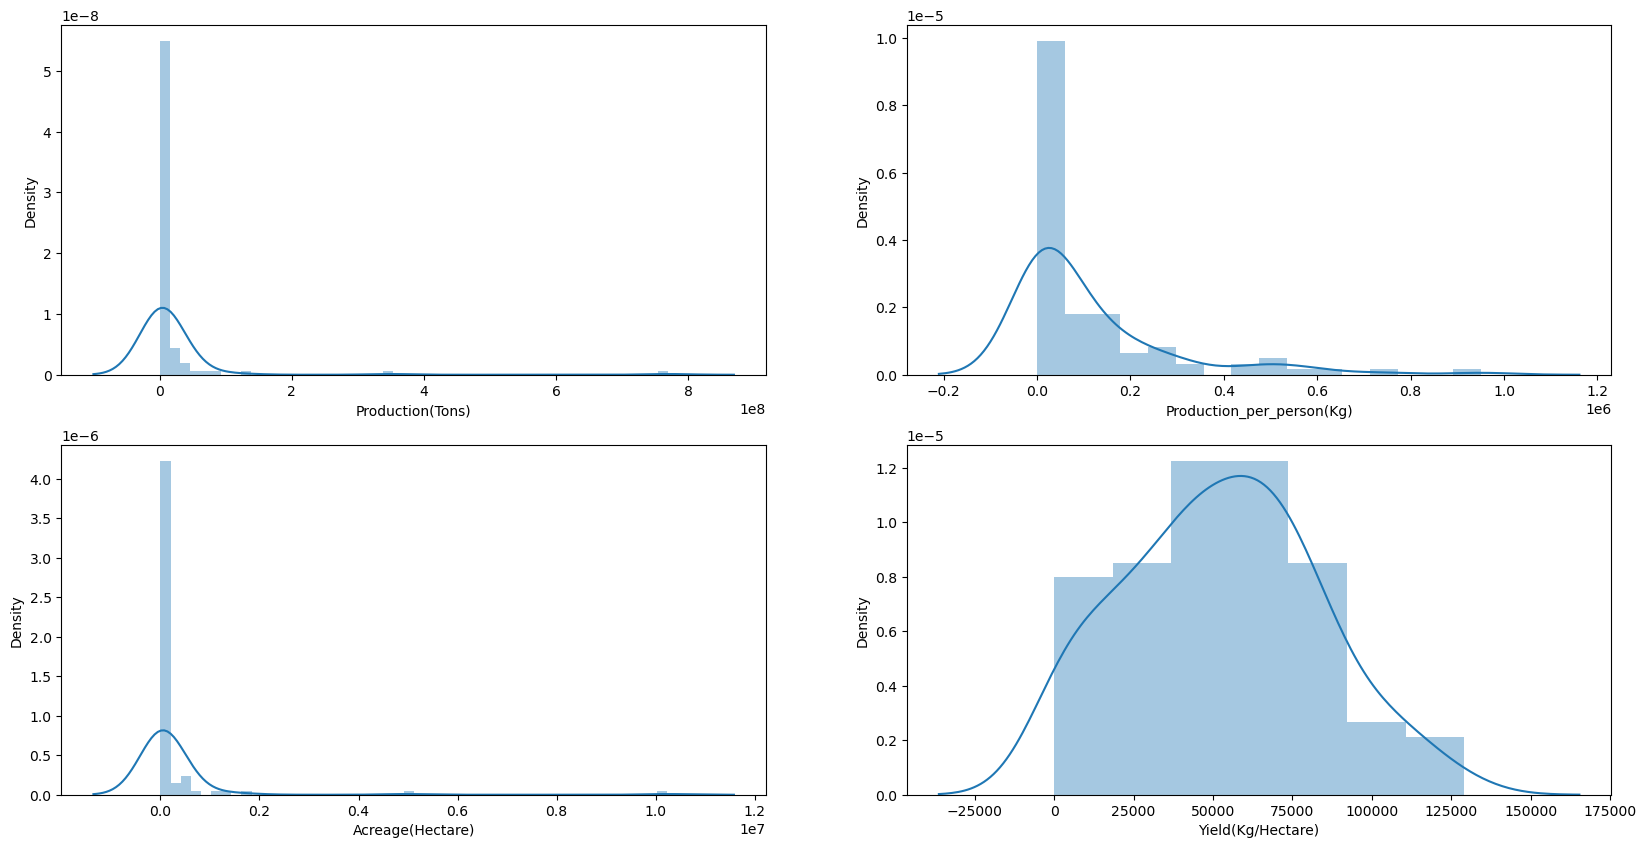

In [14]:
plt.figure(figsize = (20,10))
plt.tight_layout()
plt.subplot(221)
sns.distplot(df["Production(Tons)"])
plt.subplot(222)
sns.distplot(df["Production_per_person(Kg)"])
plt.subplot(223)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(224)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.show()

###### Observation:
The plots show somewhat but not purely right skewed distribution (except for **yield** plot).

## Data Analysis

### Univariate Analysis

#### Outliers Analysis

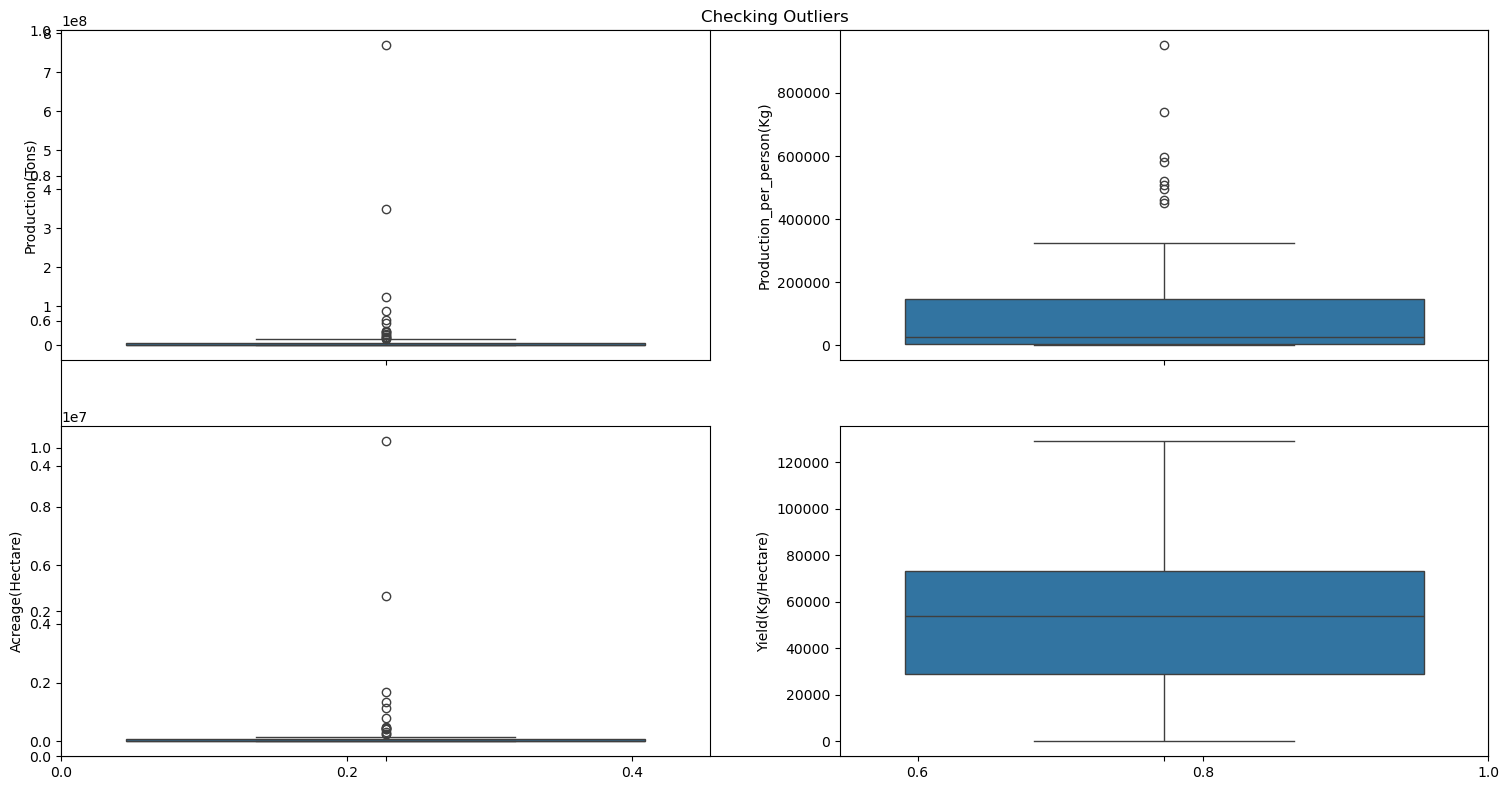

In [16]:
## checking outliers

plt.figure(figsize = (15,8))
plt.title("Checking Outliers")
plt.tight_layout()
plt.subplot(221)
sns.boxplot(df["Production(Tons)"])
plt.subplot(222)
sns.boxplot(df["Production_per_person(Kg)"])
plt.subplot(223)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(224)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.show()

###### Obserevation:
We have outliers in the data, it shows the countries which has maximum and minimum production. Hence, outliers were not removed or capped in data cleaning.

### Bivariate Analysis

#### Countries (count) producing Sugarcane from each Continent

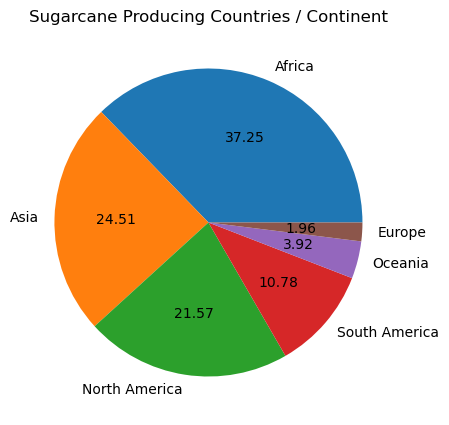

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
dtype: int64

In [17]:
## getting the number of countries/ continent in descending order

df.groupby("Continent").size().sort_values(ascending = False).plot(kind = "pie", autopct = "%.2f",
                                                                   title = "Sugarcane Producing Countries / Continent", figsize = (5,5))
plt.show()
df.groupby("Continent").size().sort_values(ascending = False)

###### Observation:
Africa has the maximum number of countries producing sugarcane (38), followed by Asia (25), and North America (22).

#### Sugarcane Production (in Tons) from each Continent

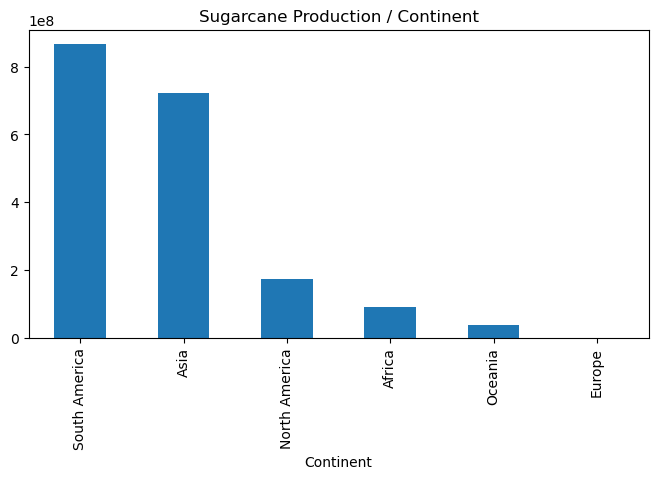

Continent
South America    865588126.0
Asia             721930425.0
North America    173995947.0
Africa            89681472.0
Oceania           36177574.0
Europe                5823.0
Name: Production(Tons), dtype: float64

In [18]:
## getting the production volume/ continent in descending order

df.groupby("Continent")["Production(Tons)"].sum().sort_values(ascending = False).plot(kind = "bar", title = "Sugarcane Production / Continent",
                                                                                      figsize = (8,4))
plt.show()
df.groupby("Continent")["Production(Tons)"].sum().sort_values(ascending = False)

###### Observation:
South America produces the maximum volume (865588126 tons) of sugarcane, followed by Asia, and North America.

#### Sugarcane Production (in Tons) per Country

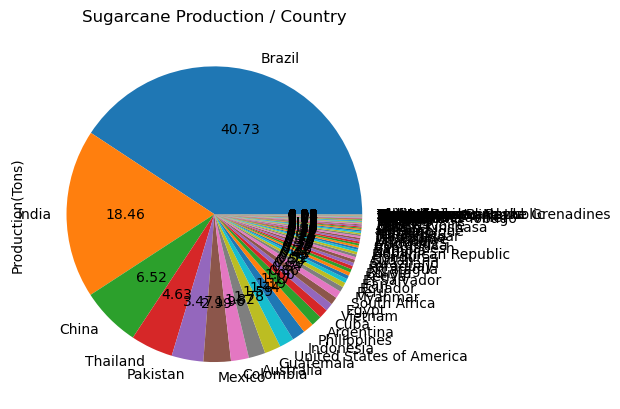

In [19]:
## creating a temporary dataframe to plot 
## Country |  Total Sugarcane Production

df_temp = df[["Country","Production(Tons)"]].set_index("Country")
df_temp["Production(Tons)"].plot(kind = "pie", title = "Sugarcane Production / Country", autopct = '%.2f')
plt.show()

###### Observation:
Brazil (South America), India (Asia), and China (Asia) contribute to over 65% of overall sugarcane production in the world.

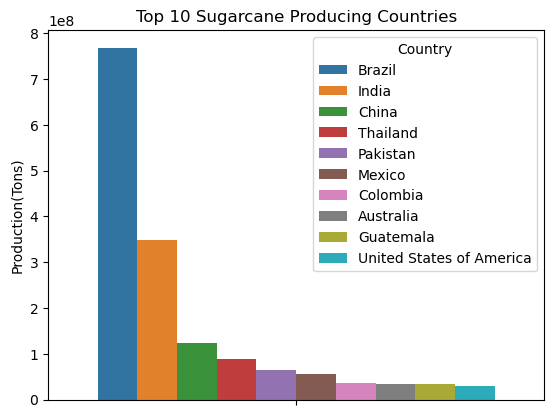

In [20]:
## Top 10 sugarcane producing countries

sns.barplot(data = df.sort_values("Production(Tons)", ascending = False).head(10), y = "Production(Tons)", hue = "Country")
plt.title("Top 10 Sugarcane Producing Countries")
plt.show()

###### Observation:
Top 10 sugarcane producing countries are (ranked from highest to lowest): Brazil, India, China, Thailand, Pakistan, Mexico, Colombia, Austraila, Guatemala, and United States of America.

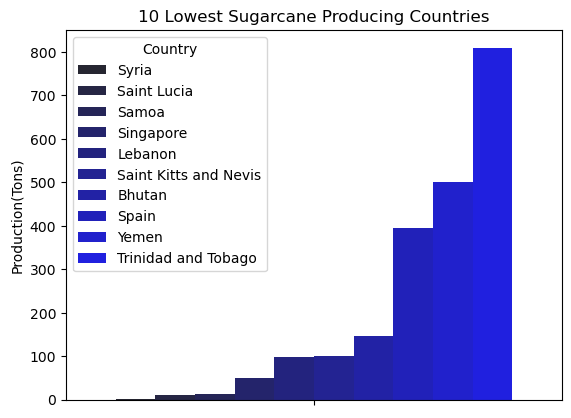

In [21]:
## Last 10 sugarcane producing countries

sns.barplot(data = df.sort_values("Production(Tons)").head(10), y = "Production(Tons)", hue = "Country", palette='dark:blue')
plt.title("10 Lowest Sugarcane Producing Countries")
plt.show()

###### Observation:
Least 10 sugarcane producing countries are (ranked from lowest to highest): Syria, Saint Lucia, Samoa, Singapore, Lebanon, Saint Kitts and Nevis, Bhutan, Spain, Yemen, and  Trinidad and Tobago.

#### Production of Sugarcane per Person (in Kg) per Continent

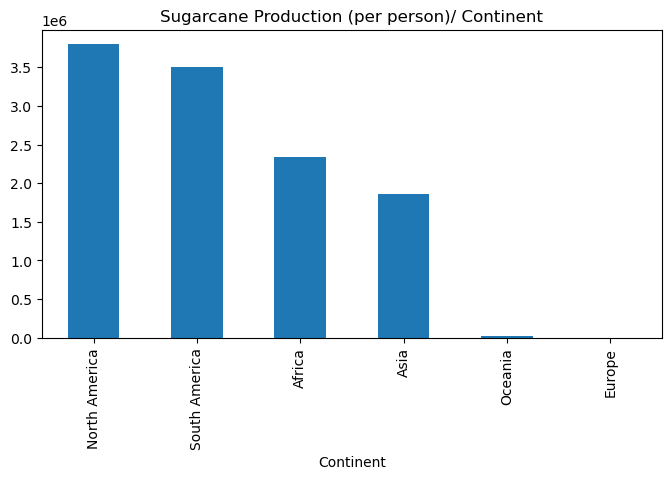

Continent
North America    3796081.508
South America    3505531.738
Africa           2332636.293
Asia             1857769.303
Oceania            28593.605
Europe               536.000
Name: Production_per_person(Kg), dtype: float64

In [22]:
## getting the production volume per person per continent in descending order

df.groupby("Continent")["Production_per_person(Kg)"].sum().sort_values(ascending = False).plot(kind = "bar", 
                                                                                               title = "Sugarcane Production (per person)/ Continent",
                                                                                               figsize = (8,4))
plt.show()
df.groupby("Continent")["Production_per_person(Kg)"].sum().sort_values(ascending = False)

###### Observation:
North America, South America, and Africa are the top 3 continents in sugarcane production per person statistics.

#### Production of Sugarcane per Person (in Kg) per Country

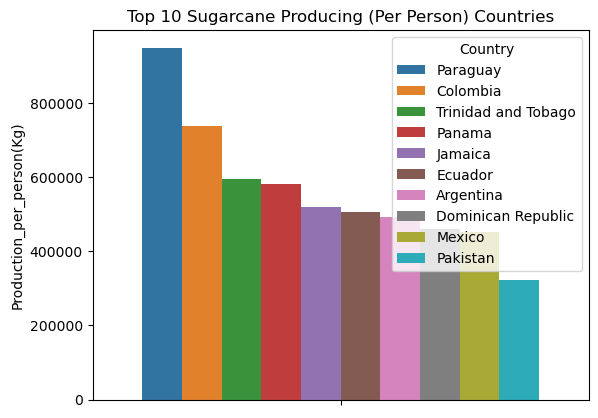

In [23]:
## Top 10 sugarcane production (per person) countries

sns.barplot(data = df.sort_values("Production_per_person(Kg)", ascending = False).head(10), y = "Production_per_person(Kg)", hue = "Country")
plt.title("Top 10 Sugarcane Producing (Per Person) Countries")
plt.show()

###### Observation:
Paraguay (South America), Colombia (South America), and Trinidad and Tobago (North America) are the top 3 Sugarcane producing (per person) countries.

#### Acerage of Land per Continent

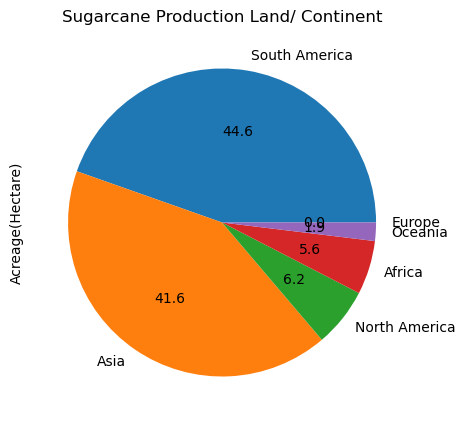

Continent
South America    11369236.0
Asia             10608319.0
North America     1581983.0
Africa            1439089.0
Oceania            490909.0
Europe                 71.0
Name: Acreage(Hectare), dtype: float64

In [24]:
## sugarcane producing land/ continent in descending order

df.groupby("Continent")["Acreage(Hectare)"].sum().sort_values(ascending = False).plot(kind = "pie", autopct = "%.1f",
                                                                   title = "Sugarcane Production Land/ Continent", figsize = (5,5))
plt.show()
df.groupby("Continent")["Acreage(Hectare)"].sum().sort_values(ascending = False)

###### Observation:
South America, and Asia has over 85% of total sugarcane production area.

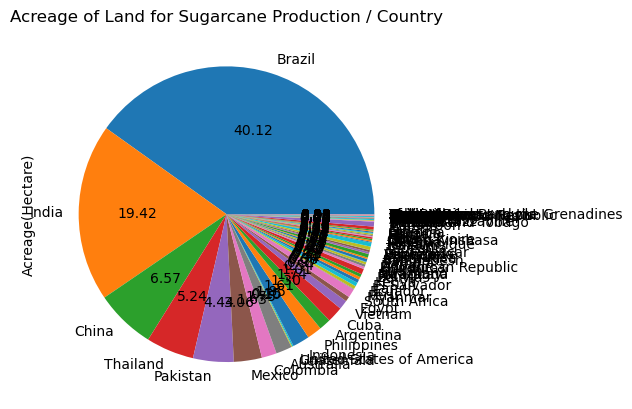

In [25]:
## creating a temporary dataframe to plot 
## Country |  Acreage of Land

df_temp = df[["Country","Acreage(Hectare)"]].set_index("Country")
df_temp["Acreage(Hectare)"].plot(kind = "pie", title = "Acreage of Land for Sugarcane Production / Country", autopct = '%.2f')
plt.show()

###### Observation:
Brazil (South America), India (Asia), and China (Asia) has over 65% of the total sugarcane producing lands.

#### Sugarcane yield per Continent

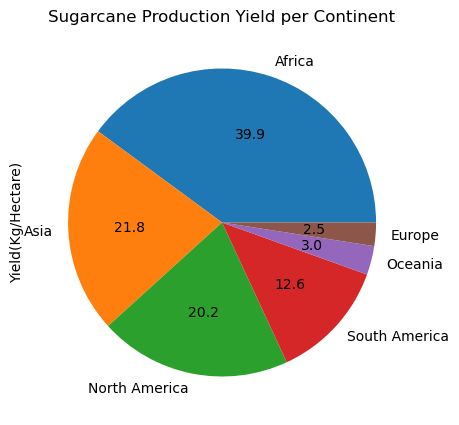

Continent
Africa           2142107.5
Asia             1171871.4
North America    1082602.4
South America     677192.7
Oceania           162419.1
Europe            131870.9
Name: Yield(Kg/Hectare), dtype: float64

In [26]:
## sugarcane yield from production/ continent in descending order

df.groupby("Continent")["Yield(Kg/Hectare)"].sum().sort_values(ascending = False).plot(kind = "pie", autopct = "%.1f",
                                                                   title = "Sugarcane Production Yield per Continent", figsize = (5,5))
plt.show()
df.groupby("Continent")["Yield(Kg/Hectare)"].sum().sort_values(ascending = False)

###### Observation:
Africa produces the maximum sugarcane yield followed by Asia, North America, South America, Ocenia and Europe.

#### Sugarcane yield per Country

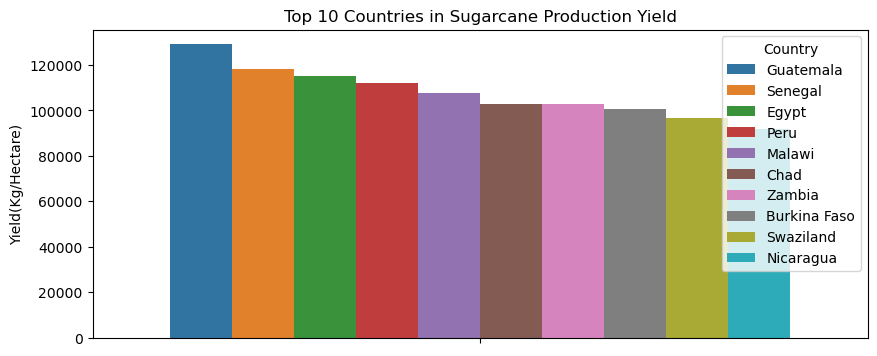

In [27]:
## Top 10 sugarcane production yield countries

plt.figure(figsize = (10,4))
sns.barplot(data = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(10), y = "Yield(Kg/Hectare)", hue = "Country")
plt.title("Top 10 Countries in Sugarcane Production Yield")
plt.show()

###### Observation:
Top 10 countries in Sugarcane Production Yield are Guatemala, Senegal, Egypt, Peru, Malawi, Chad, Zambia, Burkina Faso, Swaziland, and Nicaragua.

### Multivariate Analysis (For Countries)

#### Correlation

In [28]:
df.corr(numeric_only = True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


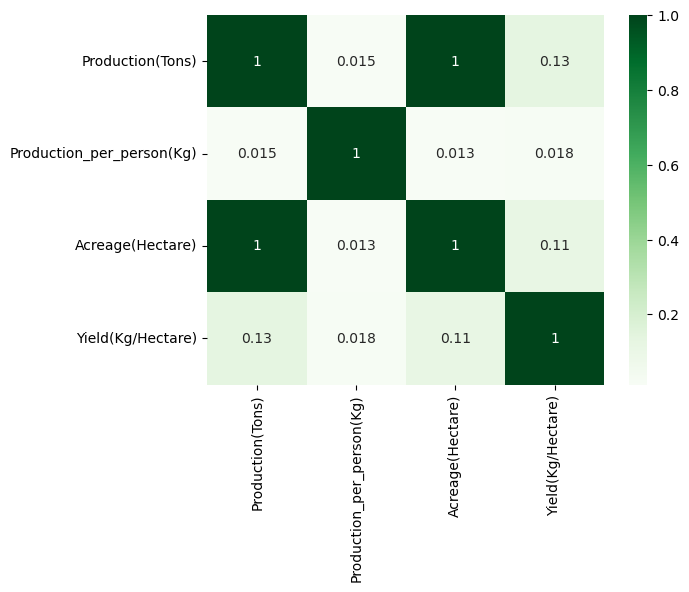

In [29]:
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = ".2g", cmap = "Greens")
plt.show()

#### Do countries with higher production of sugarcane has higher acerage of land?

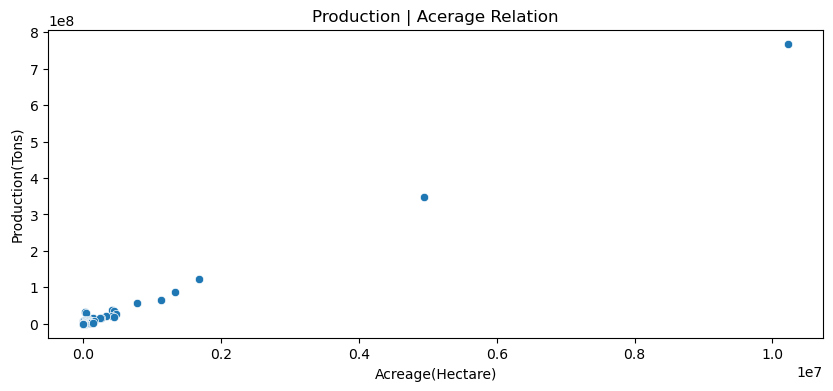

In [30]:
plt.figure(figsize = (10,4))
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)")
plt.title("Production | Acerage Relation")
plt.show()

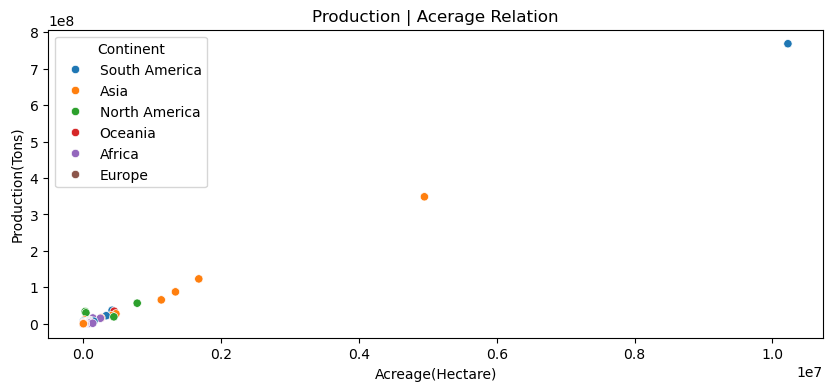

In [31]:
plt.figure(figsize = (10,4))
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent")
plt.title("Production | Acerage Relation")
plt.show()

###### Observation:
Overall increase in land increases the production.

#### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

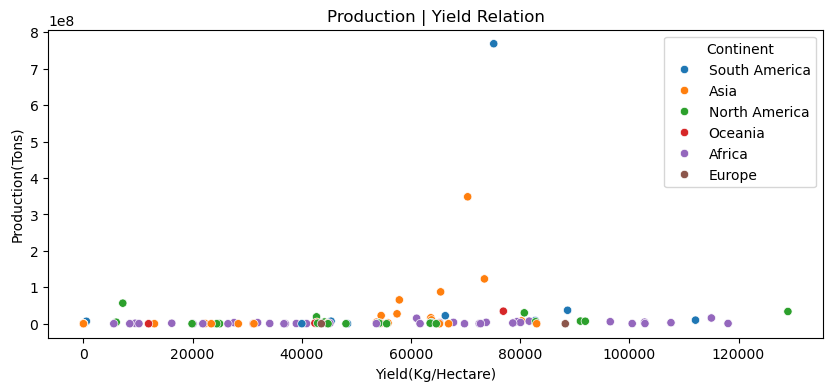

In [32]:
plt.figure(figsize = (10,4))
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)", y = "Production(Tons)", hue = "Continent")
plt.title("Production | Yield Relation")
plt.show()

###### Observation:
Sugarcane total production, and its yield are not related.

### Multivariate Analysis (For Continents)

In [33]:
## Creating a new dataframe df_continent to analyze the data Continent wise

## grouping data from df dataframe on = "Continent" and saving to a new dataframe df_continent

df_continent = df.groupby("Continent").sum()

## Adding a column for number of countries

df_continent["Number_of_countries"] = df.groupby("Continent").count()["Country"]

## dropping Country column as it would hava all the strings of Country names
## concatenated (per Continent), for e.g, Asia will have - IndiaPakistanChinaThailand... and so on

df_continent = df_continent.drop( "Country", axis = 1)
df_continent.head()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4


#### Correlation

In [34]:
df_continent.corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


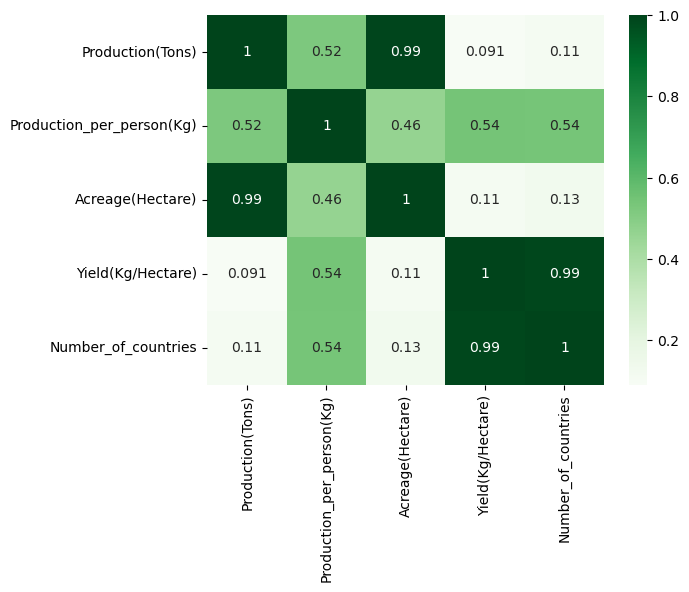

In [35]:
sns.heatmap(df_continent.corr(numeric_only = True), annot = True, fmt = ".2g", cmap = "Greens")
plt.show()

#### Do number of countries in a continent effects production of sugarcane?

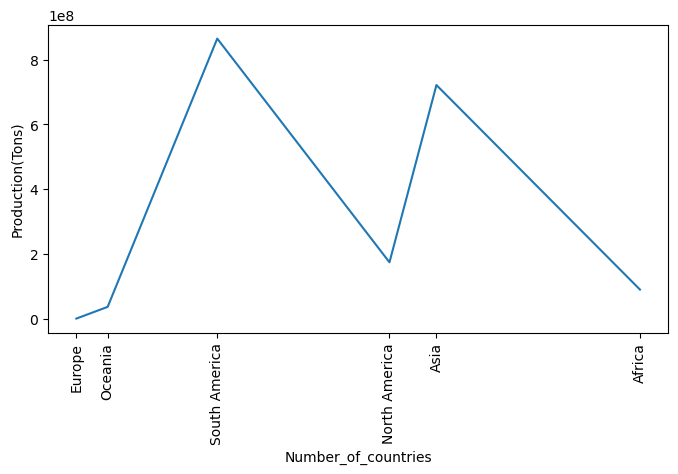

In [36]:
continent_names = df_continent.index.to_list()

plt.figure(figsize = (8,4))
sns.lineplot(data = df_continent,x = "Number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["Number_of_countries"], continent_names, rotation =90)
plt.show()

###### Observation:
Number of countries in a continent do not impact the total production of sugarcane.

#### Do continent with highest land produces more sugarcane?

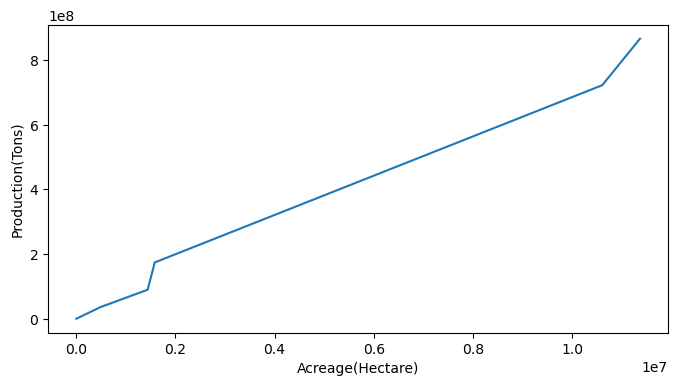

In [37]:
plt.figure(figsize = (8,4))
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)")
plt.show()

###### Observation:
Continents with higher land produces more sugarcane.

#### Do continent with highest land produces more sugarcane per person?

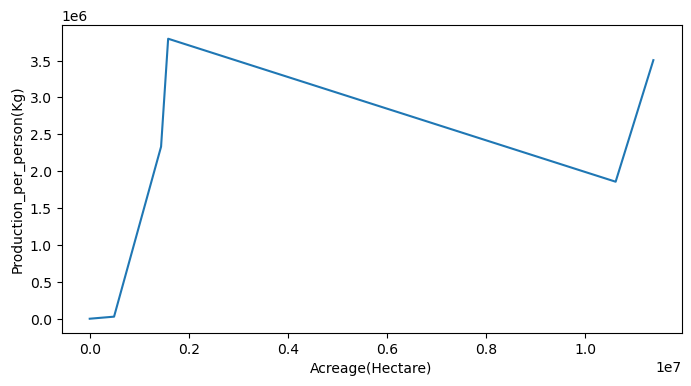

In [38]:
plt.figure(figsize = (8,4))
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production_per_person(Kg)")
plt.show()

###### Observation:
Production of sugarcane per person does not depend upon the acerage of land available for sugarcane production per continent.

#### Is the total production of sugarcane and production per person of sugarcane related for every continent?

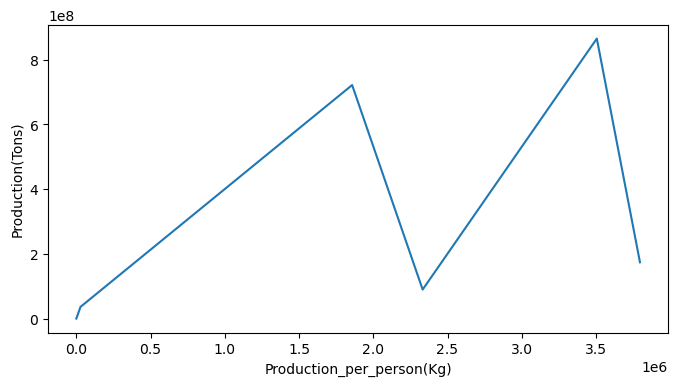

In [39]:
continent_names = df_continent.index.to_list()

plt.figure(figsize = (8,4))
sns.lineplot(data = df_continent,x = "Production_per_person(Kg)", y= "Production(Tons)")
plt.show()

###### Observation:
Total production of sugarcane and production per person of sugarcane do not have a relation for evey continent.

## Findings and Recommendations

Here's our top findings and recommendations:
1. Factors like number of countries producing sugarcane, sugarcane production per person and yield do not impact total sugarcane production. However, it is dependent upon the acerage of land used for sugarcan production around the world. Hence, countries and continents with higher acerage of land has higher production of sugarcane in the world.
2. Eventhough, Africa has most sugarcane producing countries (38), South America produces more sugarcane and hence are more open to export (not considering the volume used by its citizens).
3. In terms of countries - Brazil (South America), India (Asia), and China (Asia) are the top 3 sugarcane producing countries and should be the best opted by the neighbouring countries for trade.
4. Paraguay (South America) produces the most sugarcane per person, Brazil (South America) has the highest acerage of land used for sugarcane production, and Guatemala (North America) gives maximum yield of sugarcane.

### Limitations

- I had to replace the commas and decimals as they were providing irrelevant da.ta
- I had typecasted the data types into float for better analysis.

I hope you enjoyed it! Please share your feedback. 😄😅

Check out more such Data Analysis Projects [here](https://github.com/soumyadas96/Data-Analysis-Projects)!

[Click here to view other projects in my repository!](https://github.com/soumyadas96?tab=repositories)